<a href="https://colab.research.google.com/github/JS0501/ESAA_YB3/blob/main/ESAA_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **[개념 필사]**



*   plt.style.use('fivethirtyeight'): 파이썬 시각화 라이브러리인 Matplotlib에서 제공하는 스타일 시트 중 하나를 사용하는 코드, 그래프의 시각적 요소들이 FiveThirtyEight이라는 데이터 저널리즘 사이트에서 사용하는 시각화 스타일처럼 바
*   %matplotlib inline: 매직 명령어로, 그래프를 노트북 셀 안에 바로 표시되도록 함
*   data.isnull().sum(): 결측치 확인
*   data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True): plot.pie -> 파이 차트로 그리기 / explode -> 조각을 살짝 떼어냄 (강조 효과) / autopct -> 소숫점 설정 / shadow=True -> 차트에 그림자 효과 (강조)
*   groupby -> 데이터를 그룹화해서 집계, 변환, 필터링 등을 가능하게 함
*   ordinal feature (순서형 변수): **값들 사이에 명확한 순서가 있지만** 그 차이가 수치적으로 균등하진 않음
*   pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r'): pd.crosstab -> 교차표 생성 / margins=True -> 교차표에 합계 행과 열 추가 / style.background_gradient(cmap='summer_r') -> 숫자가 클수록 더 진한
*   Logistic Regression, Support Vector Machines, Random Forest, K-Nearest Neighbors, Naive Bayes, Decision Tree, Logistic Regression 사용









#### **[코드 필사]**

에러가 생기는 부분은 주석 처리 하였습니다

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EDA To Prediction (DieTanic)**

*Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.*

The sinking of the Titinic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name **DieTanic.** This is a very unforgetable disaster that no one in the world can forger.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

The Objective of this notebook is to give an **idea how is the workflow in any predictive modeling problem.** How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.

If You Like the notebook and think that it helped you.. **PLEASE UPVOTE.** It will keep me motivated.

Contents of the Notebook:

Part1: Exploratory Data Analysis (EDA):
1) Analysis of the features.
2) Finding any relations or trends considering multiple features.

Part2: Feature Engineering and Data Cleaning:
1) Adding any new features.
2) Removing redundant features.
3) Converting features into suitable form for modeling.

Part3: Predictive Modeling
1) Running Basic Algorithms
2) Cross Validation
3) Ensembling
4) Important Features Extraction

### **Part1: Exploratory Data Analysis (EDA)**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
data = pd.read_csv('/content/drive/MyDrive/ESAA/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum() # checking for total null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The Age, Cabin and Embarked have null values. I will try to fix them.

How many Survived??

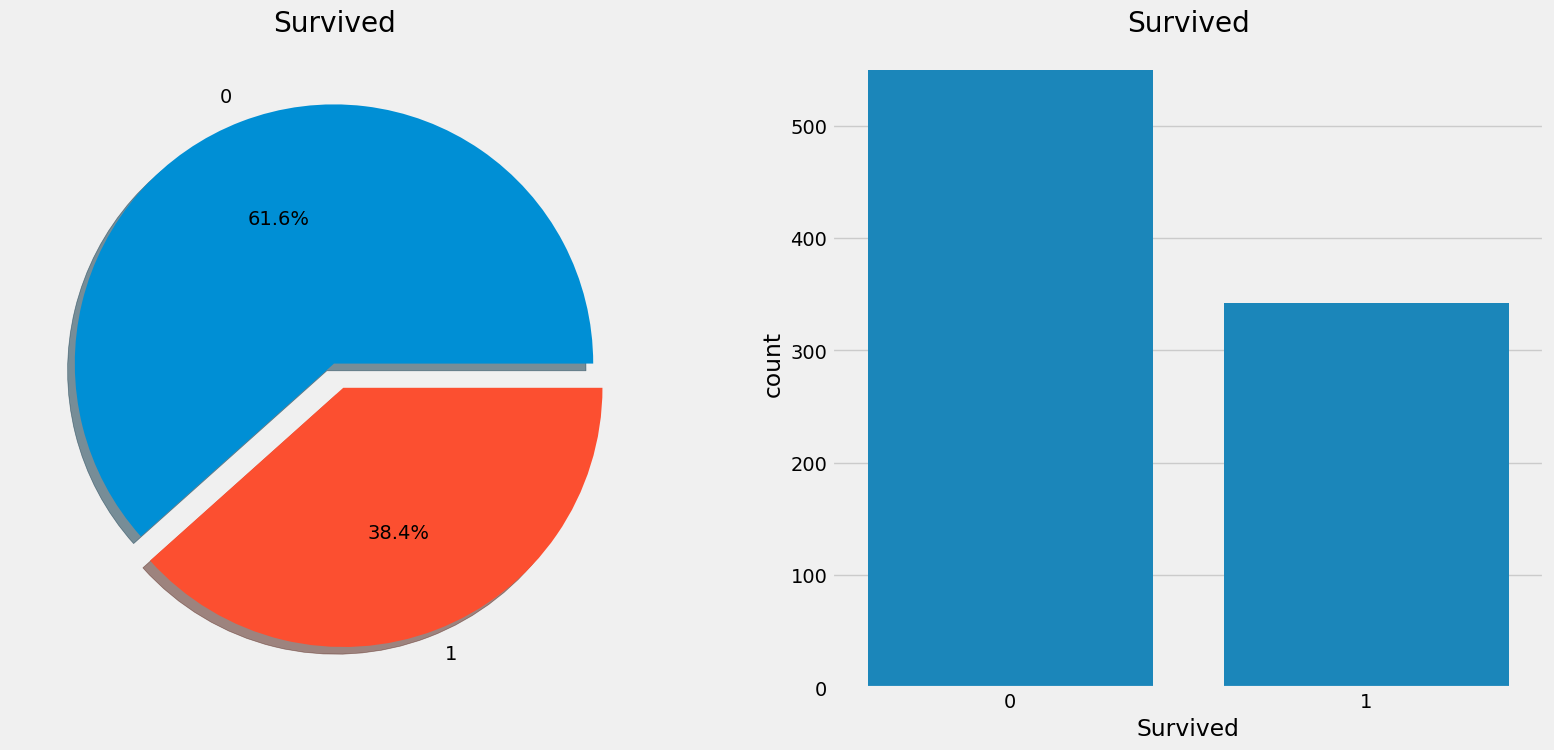

In [10]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age, etc.

First let us understand the different types of features.

#### Types of Features
##### Categorical Features:
##### A categorical variable is one that has two of more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables.**
##### **Categorical Features in the dataset: Sex, Embarked.**

##### Ordinal Features:
##### An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal varialbe. Here we can have a relative sort in the variable.
##### **Ordinal Features in the dataset: PClass

##### Continuous Feature:
##### A feature is said to be continuous if it can take values between any two points or between the minimum or maximum values in the features column.
##### **Continuous Features in the dataset: Age**


Analysing The Features

Sex -> Categorical Feature

In [11]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

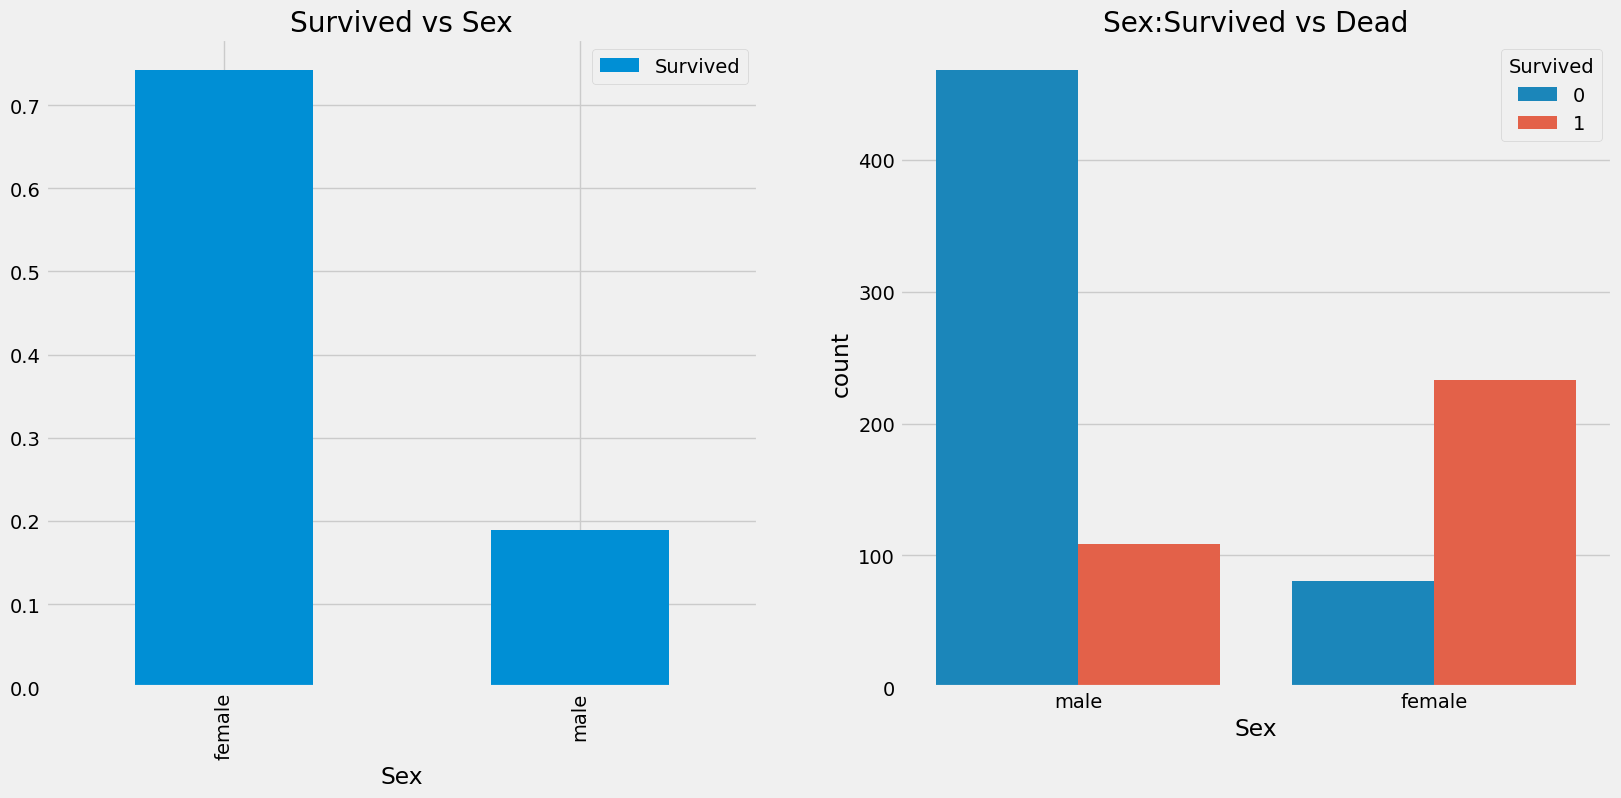

In [12]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number or women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men is around 18-19%.**

This looks to be a **very important** feature for modeling. But is it the best?? Lets check other features.

Pclass -> Ordinal Feature

In [13]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


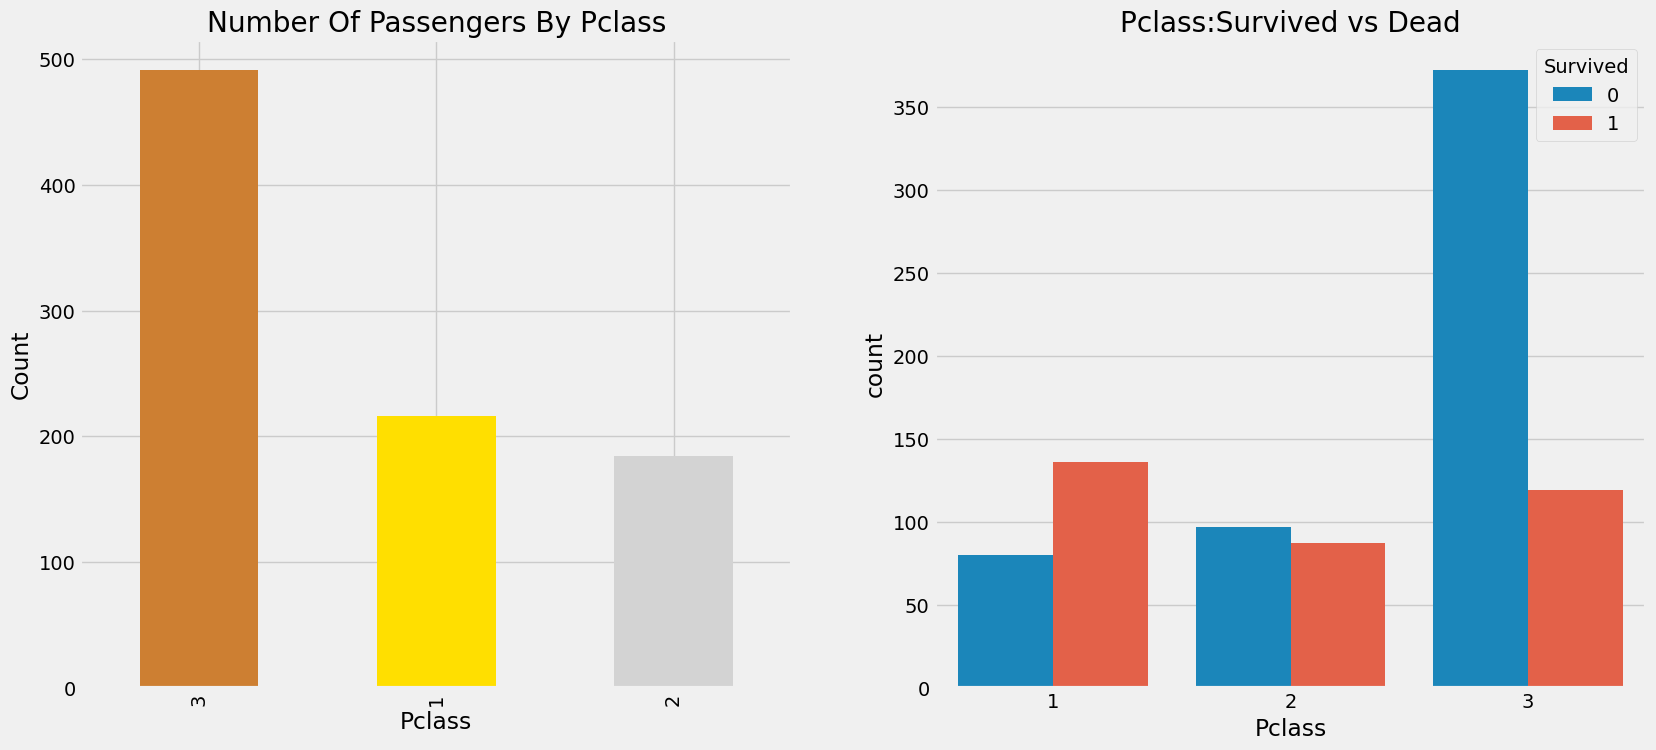

In [14]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say **Money Can't But Everything.** But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 survived is around 63% while for Pclass 2 is around 48%. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

In [16]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

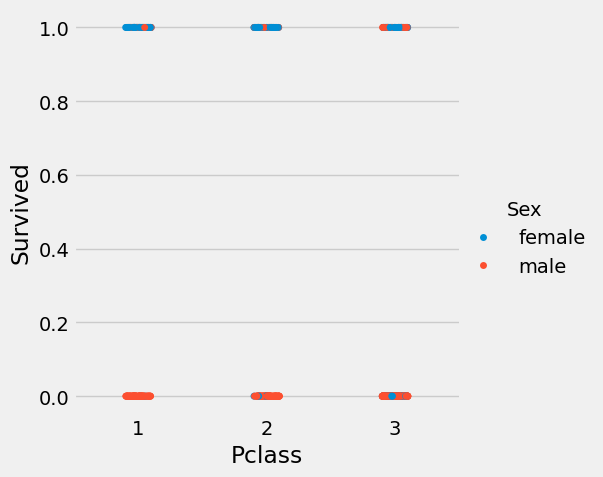

In [21]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data)
plt.show()

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

Age -> Continuous Feature

In [24]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


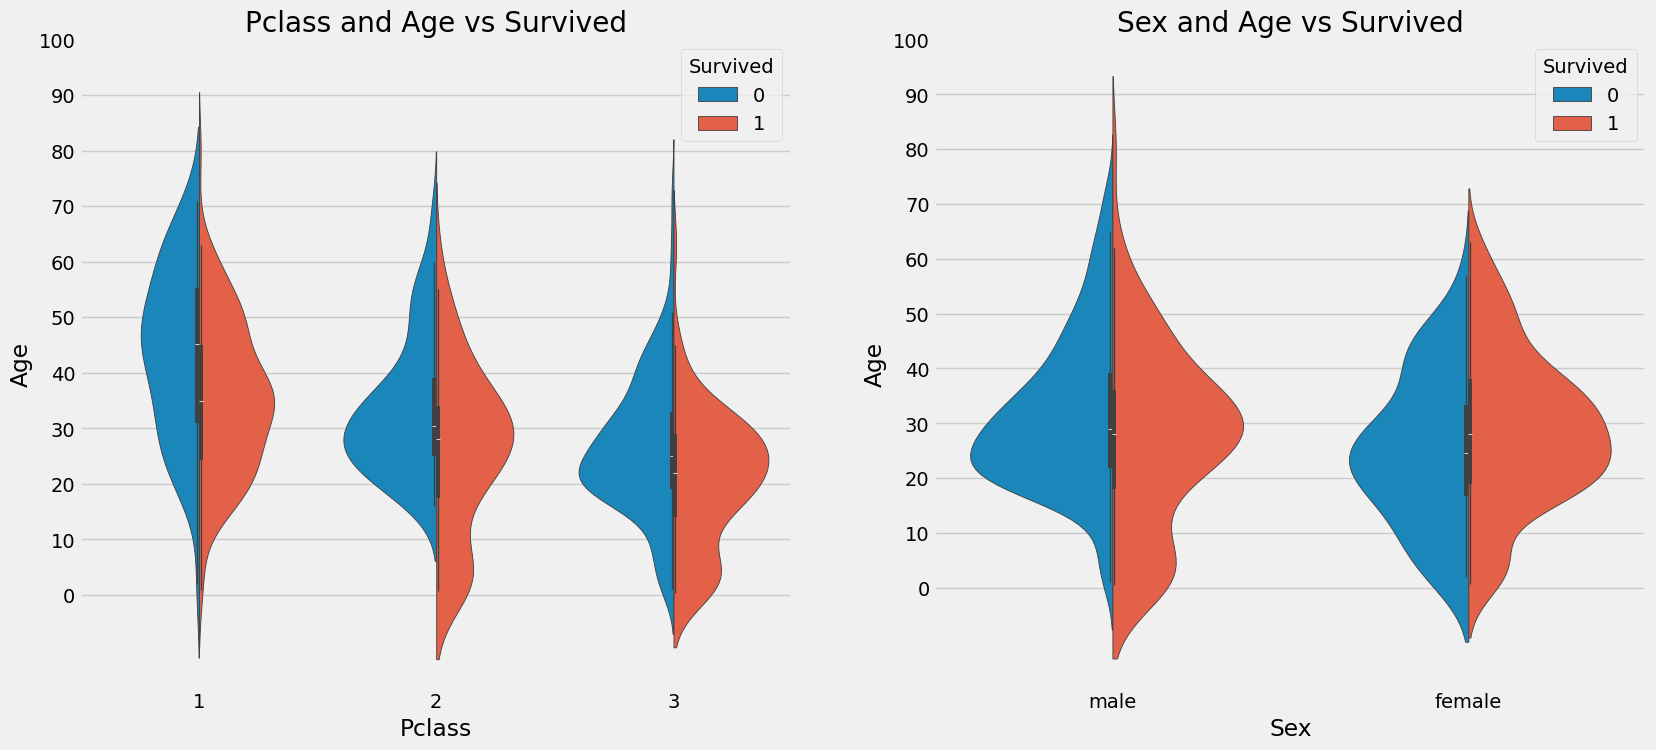

In [26]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Observations:
1) The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.
2) Survival chances for Passengers aged 20-50 from Pclass 1 is high and is even better for Women.
3) For males, the survival chances decreases with an increase in age.

As we had ween ealier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We hust cannot assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!!!, we can check the **Name** feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups

"What's In A Name??" -> Feature :p

In [27]:
data['Initial']=0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-x]+)\.') # lets extract the Salutations

In [29]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') # Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,2,40,0,0,0,517,0,0,6,1


In [30]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [31]:
data.groupby('Initial')['Age'].mean() # lets check the average age by initials

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.871560
Other,45.888889


In [32]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [33]:
data.Age.isnull().any() # So no null values left finally

np.False_

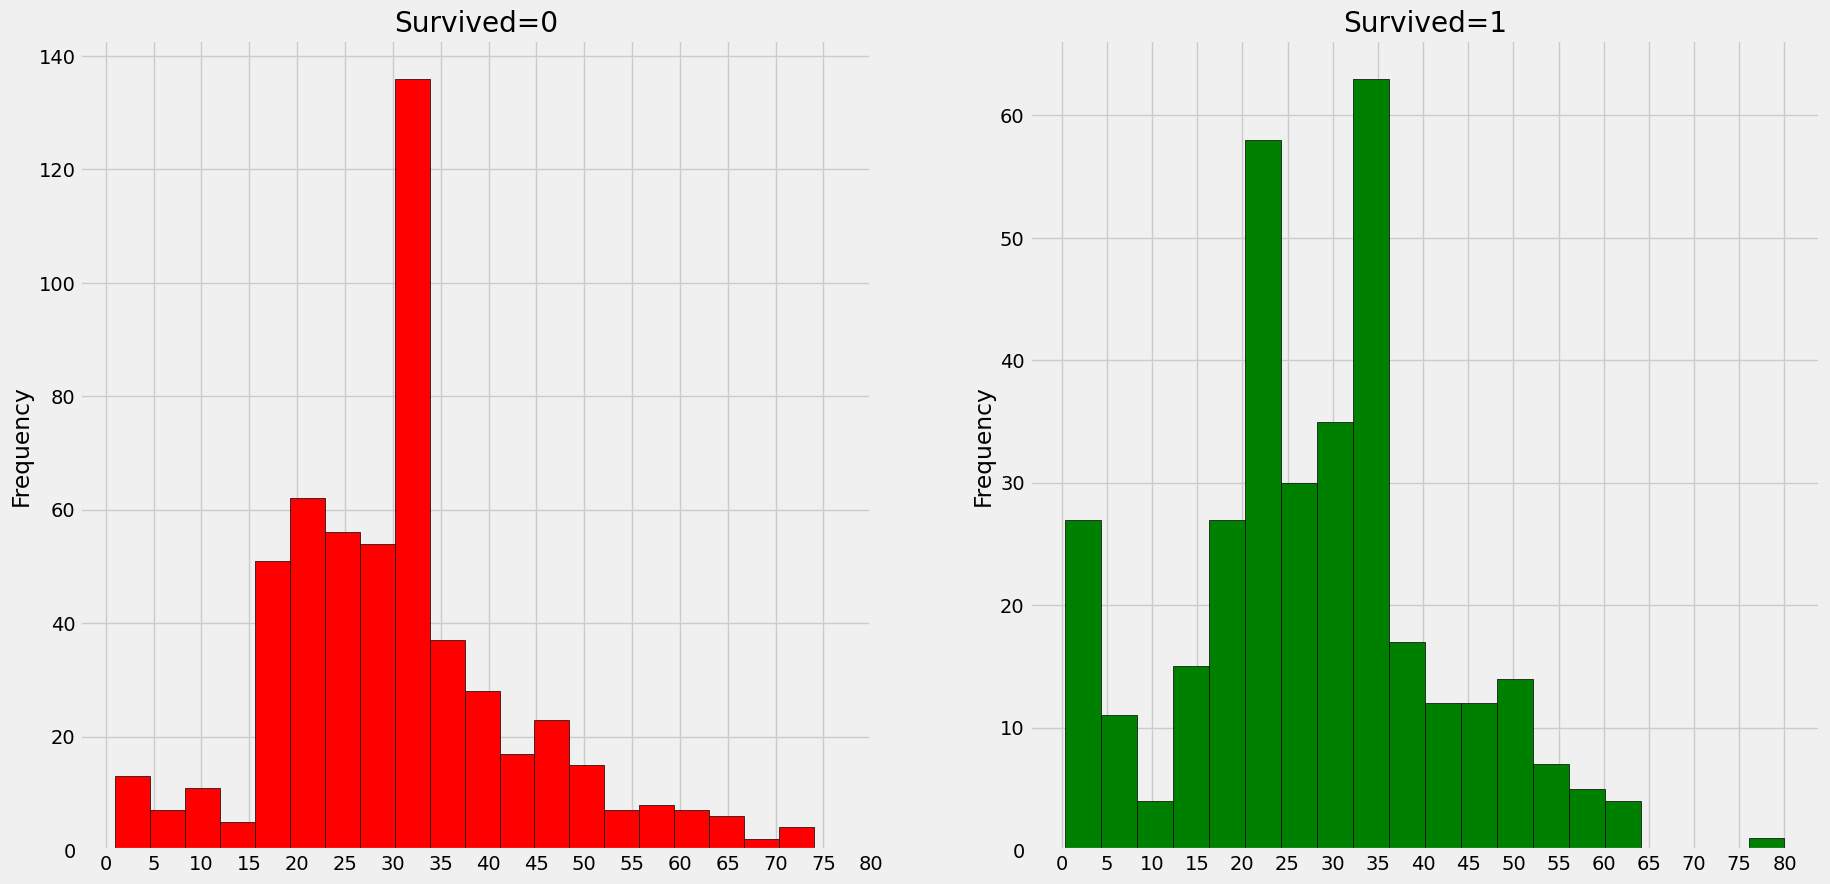

In [34]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

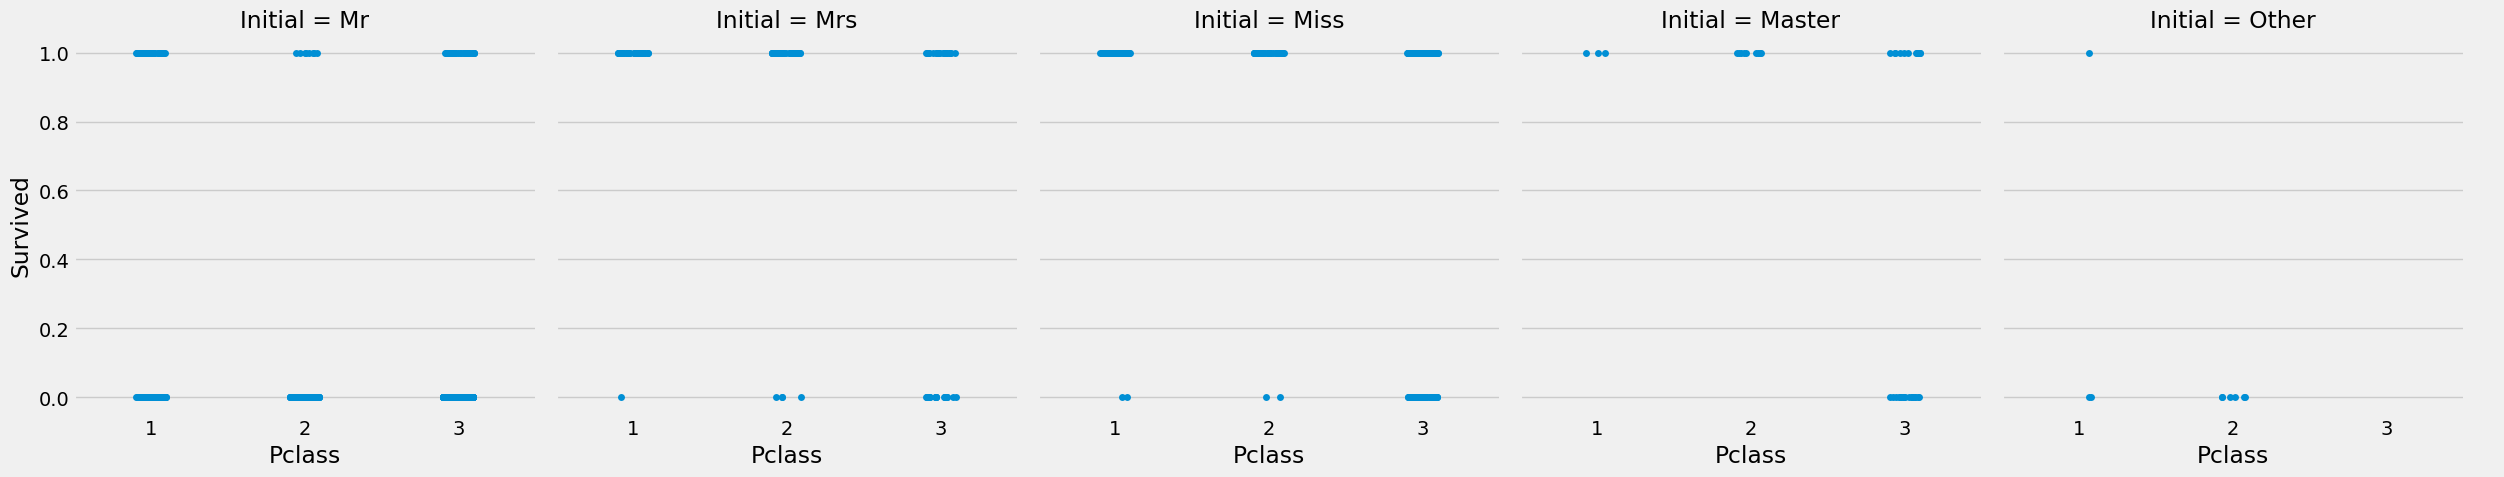

In [38]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data)
plt.show()

Embarked -> Categorical Value

In [39]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived],margins=True).style.background_gradient(cmap='summer_r')

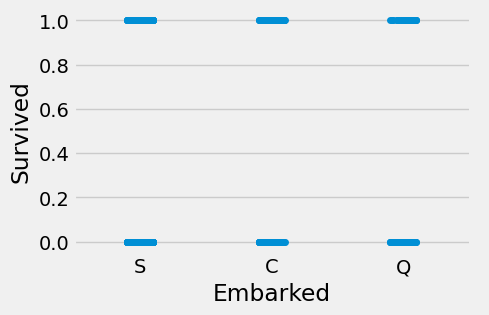

In [40]:
sns.catplot(x='Embarked',y='Survived',data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

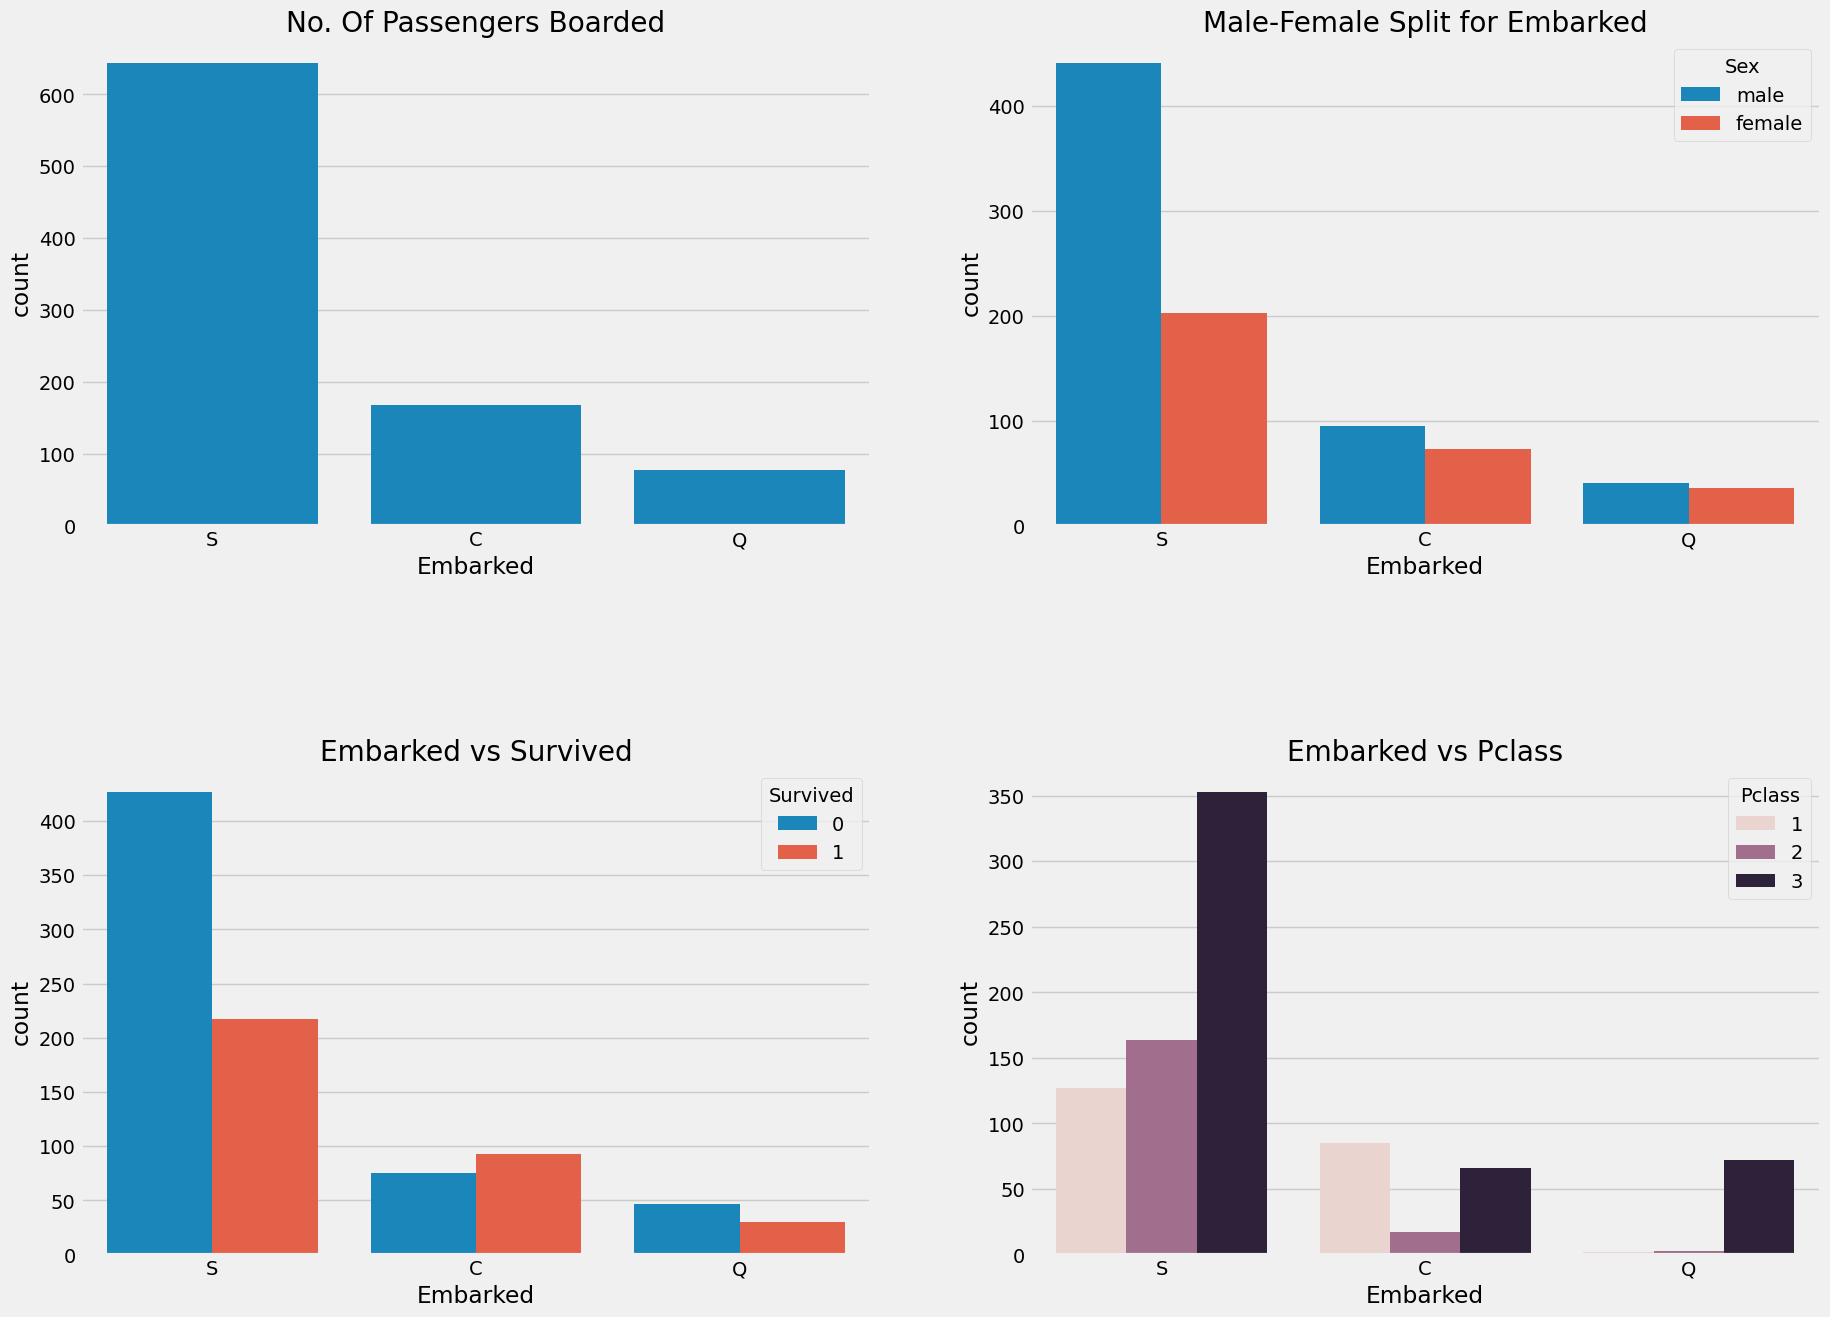

In [42]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

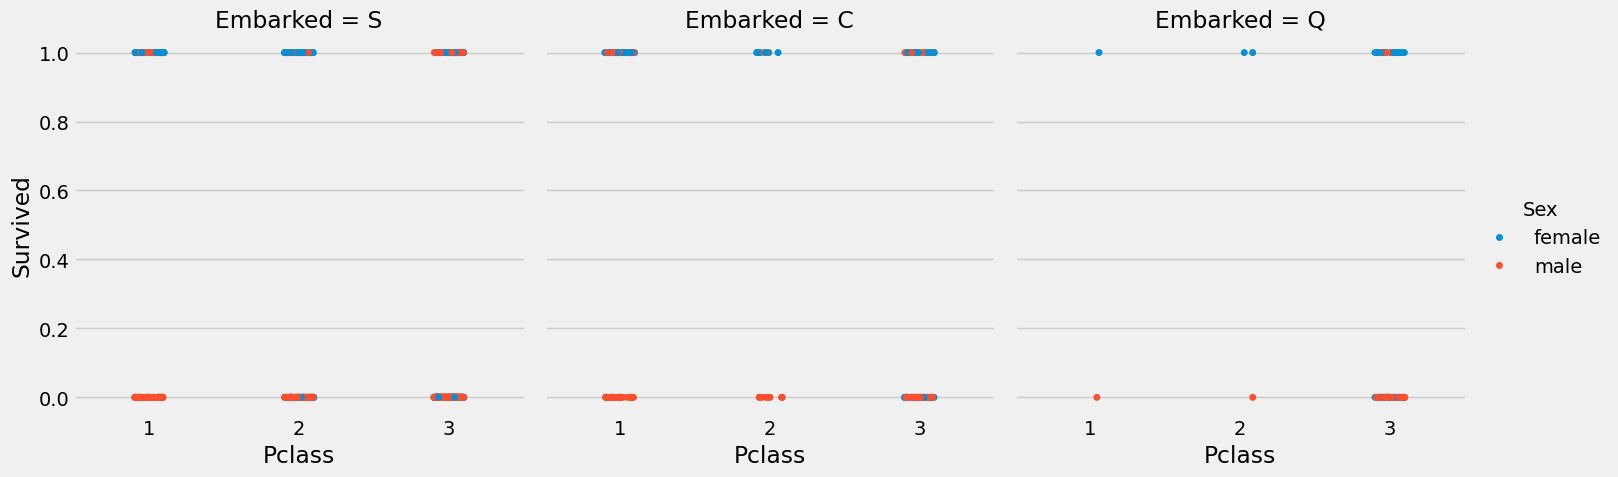

In [43]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [44]:
data['Embarked'].fillna('S',inplace=True)

In [45]:
data.Embarked.isnull().any() # Finally No NaN Values

np.False_

SibSip -> Discrete Feature

In [46]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


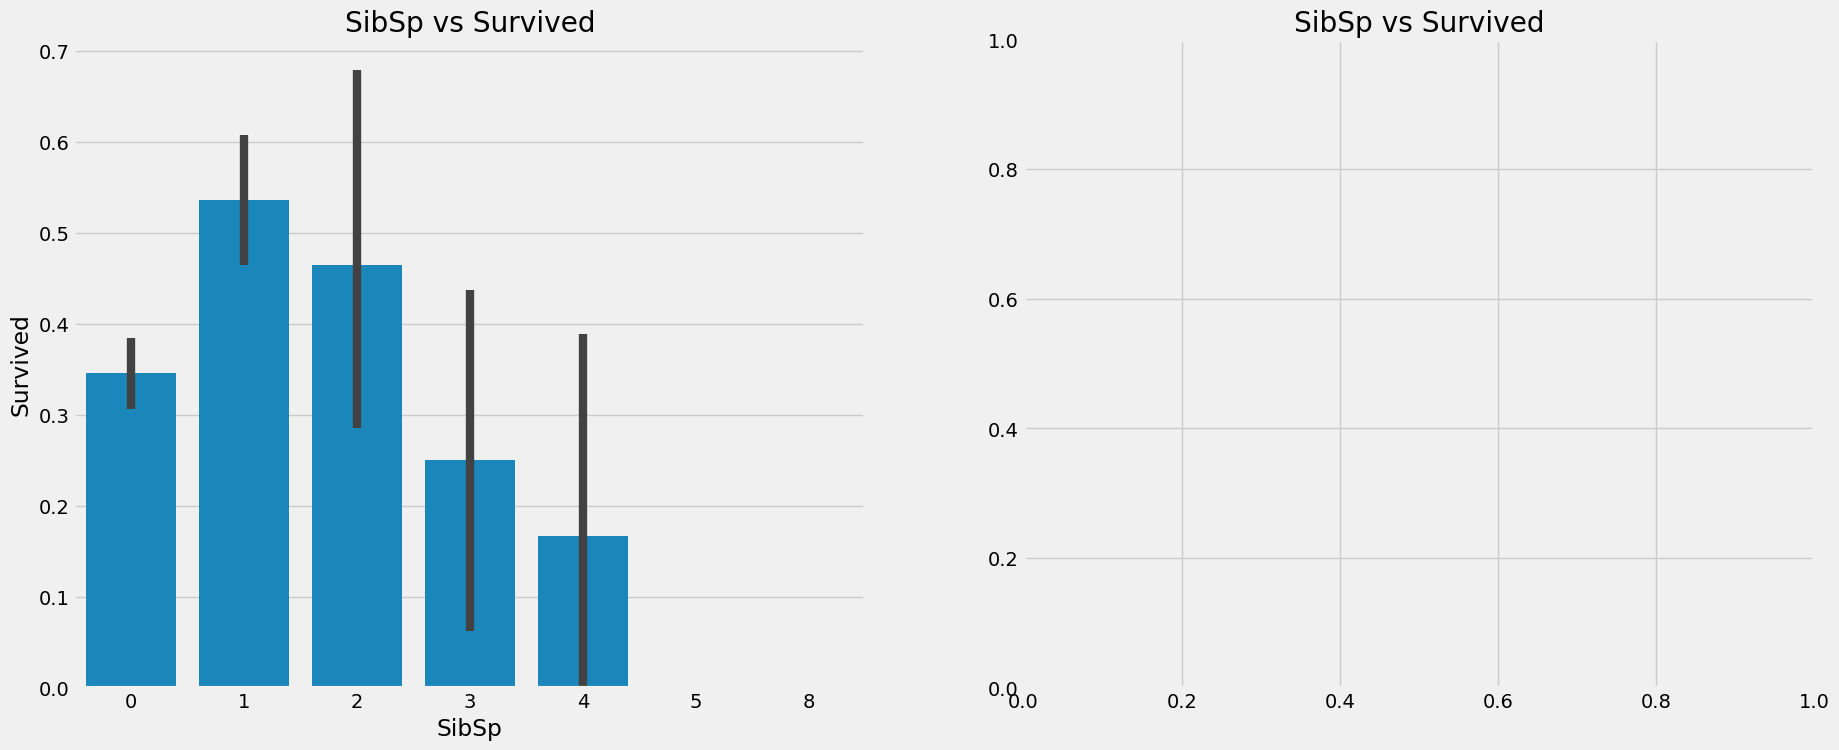

In [48]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.catplot(x='SibSp',y='Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [49]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Parch

In [50]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


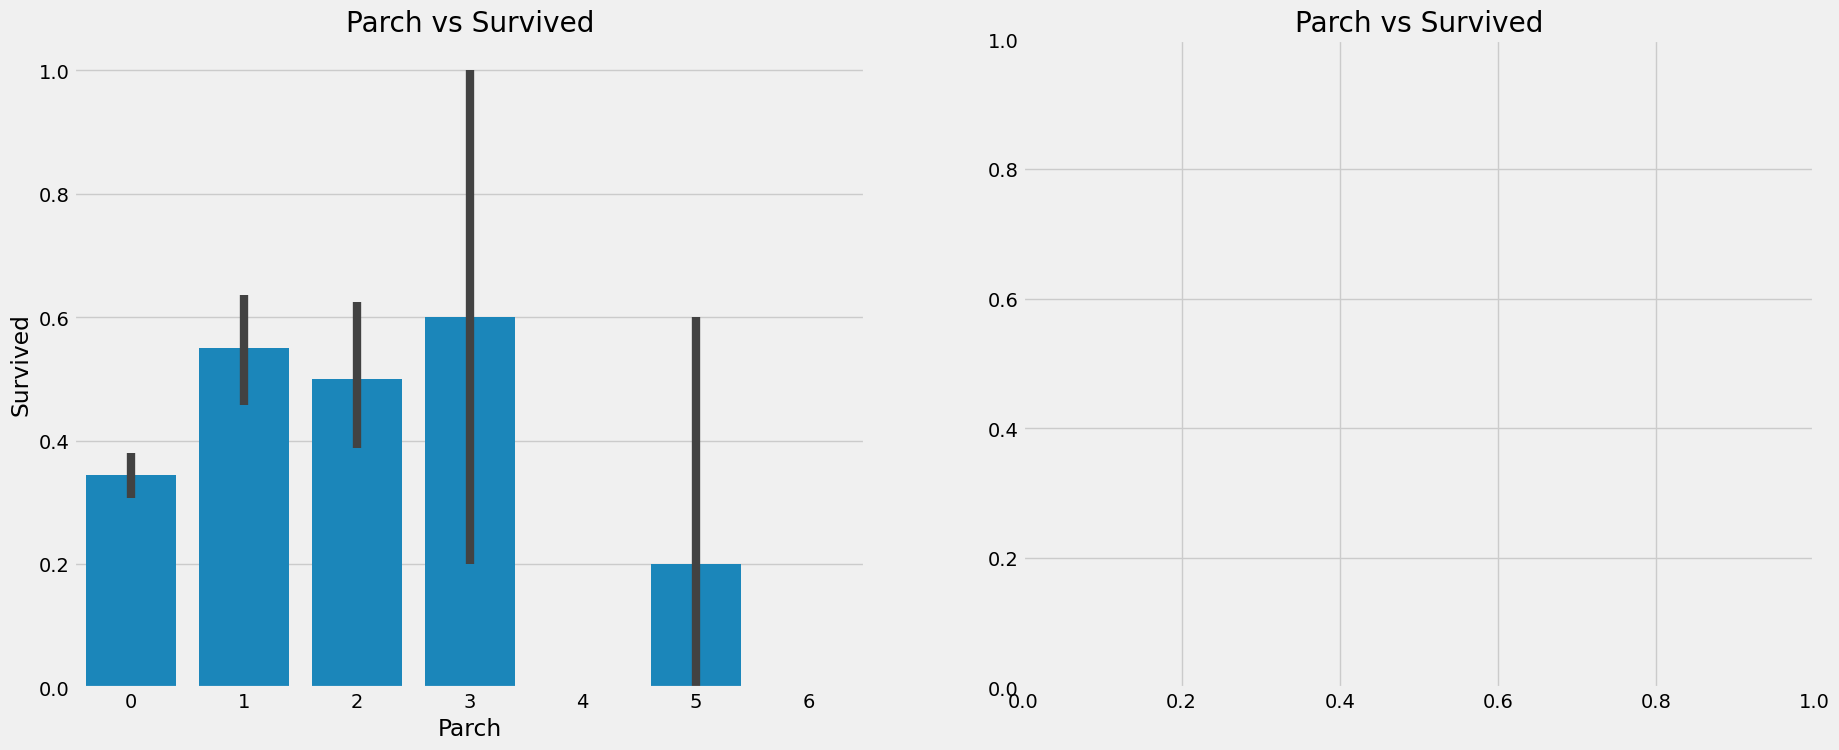

In [51]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.catplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Fare -> Continuous Feature

In [52]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


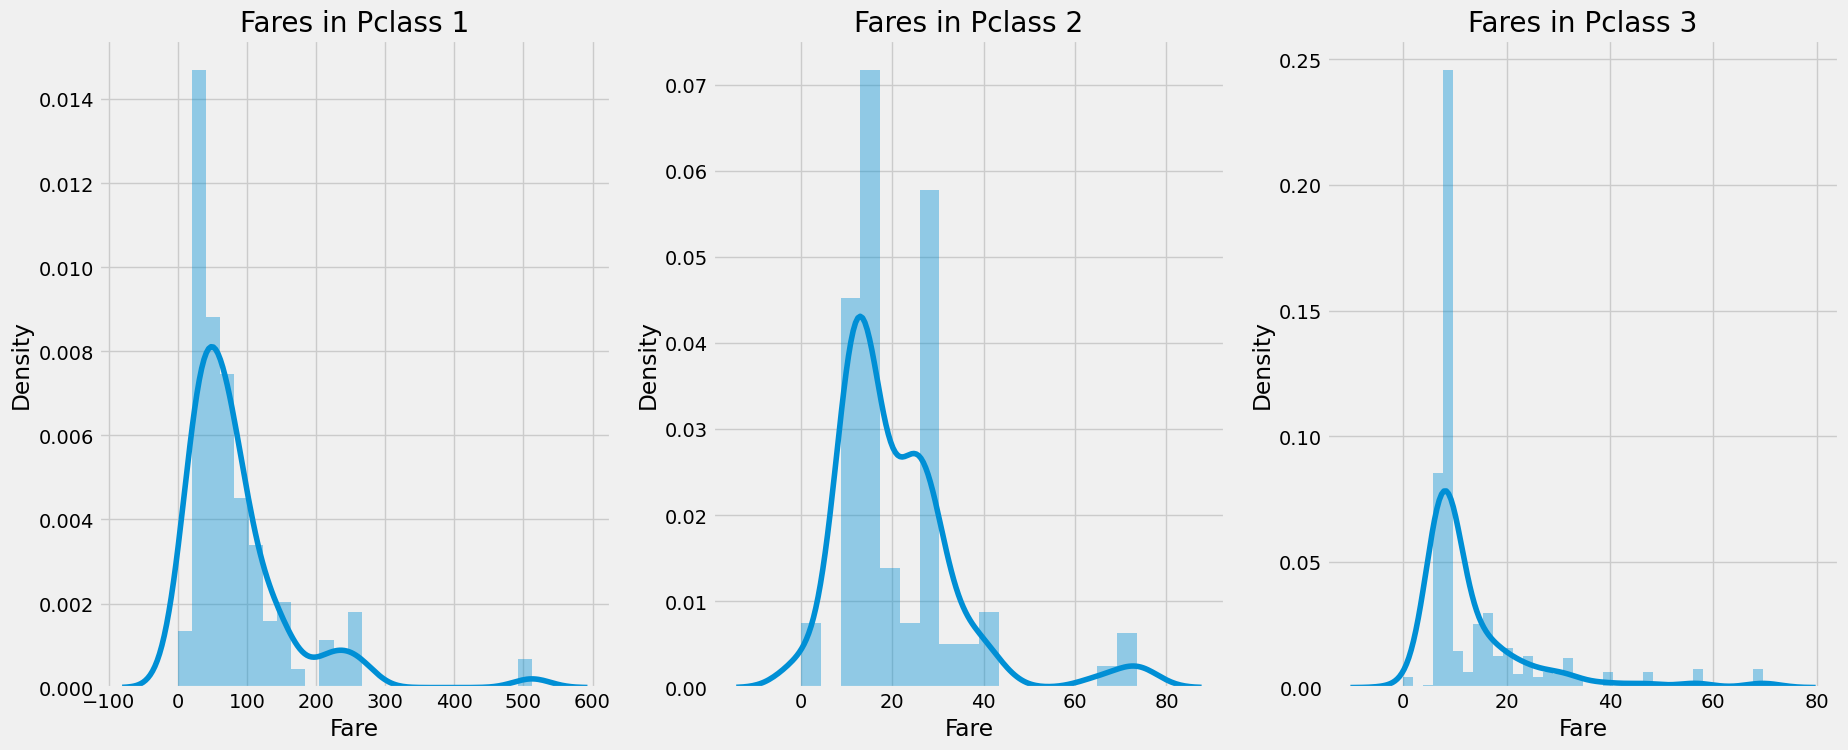

In [53]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [57]:
#sns.heatmap(data.corr(), annot=True, cmap='Blues', linewidth=0.2)
#fig = plt.gcf()
#fig.set_size_inches(10, 8)
#plt.show()

In [58]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [59]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


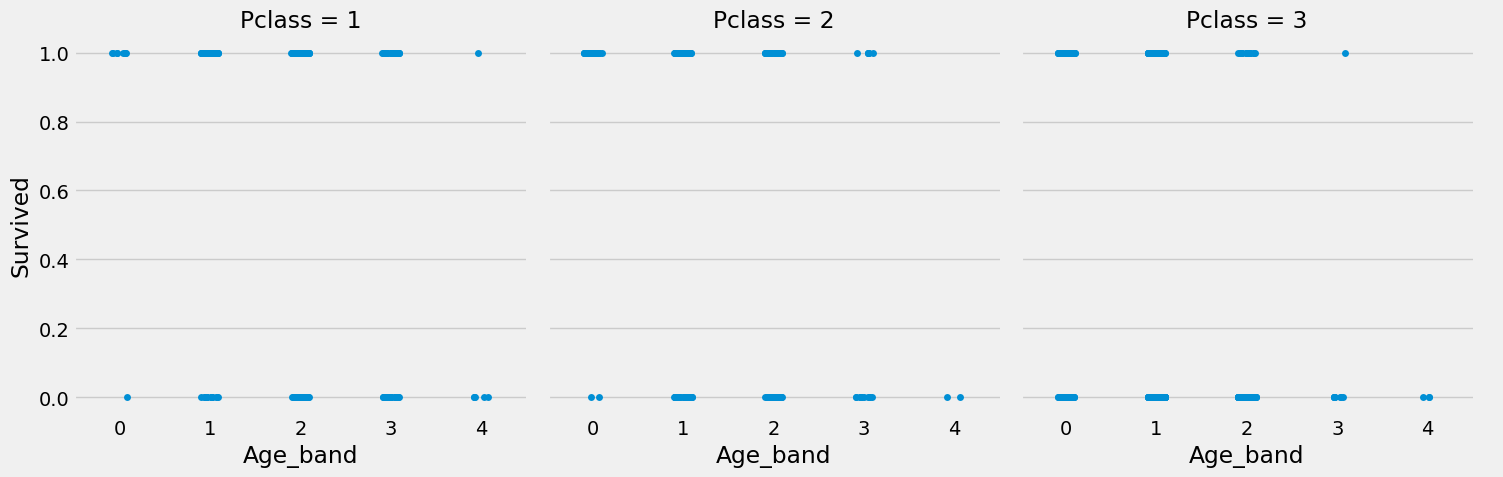

In [60]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass')
plt.show()

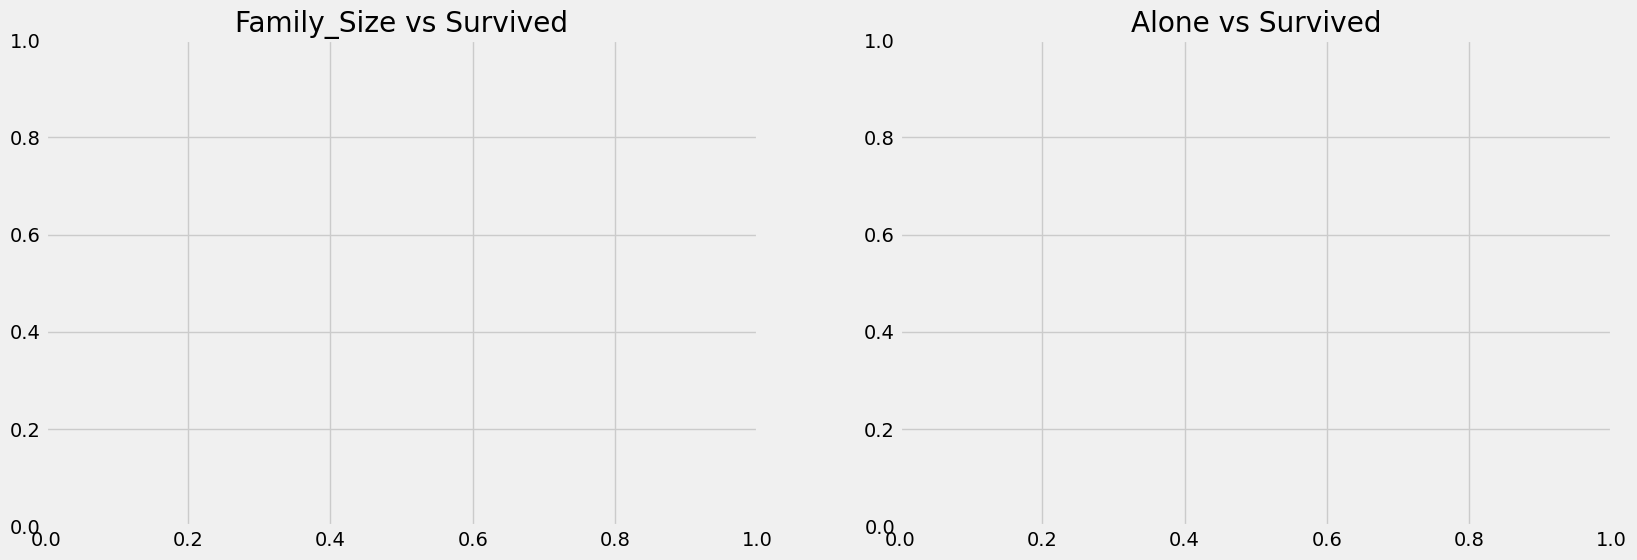

In [61]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.catplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.catplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

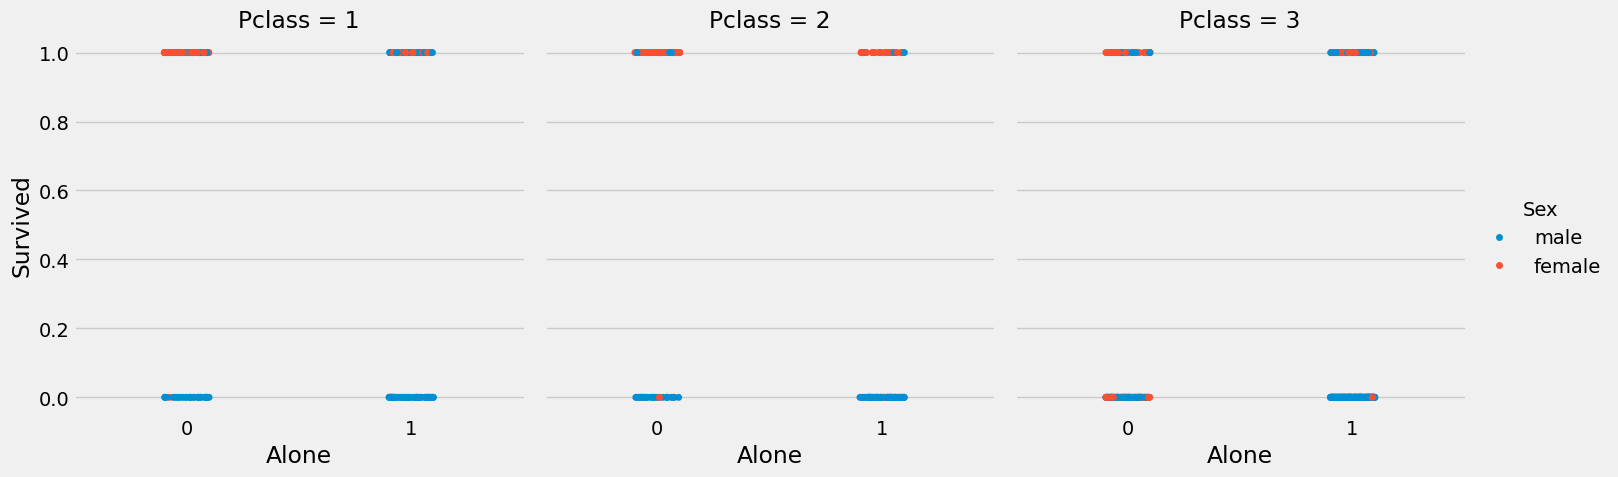

In [63]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [64]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [65]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

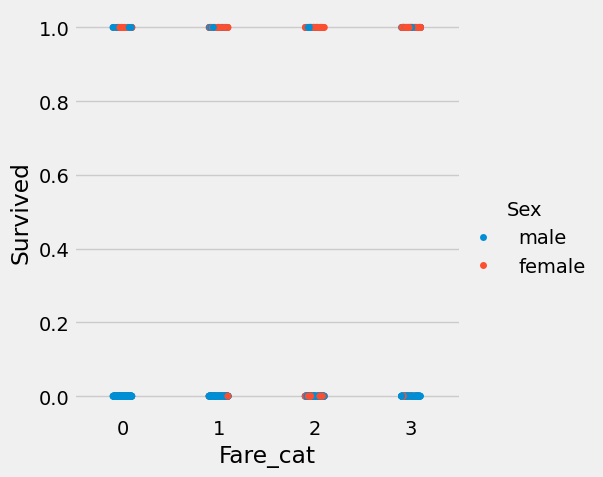

In [66]:
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex')
plt.show()

In [68]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

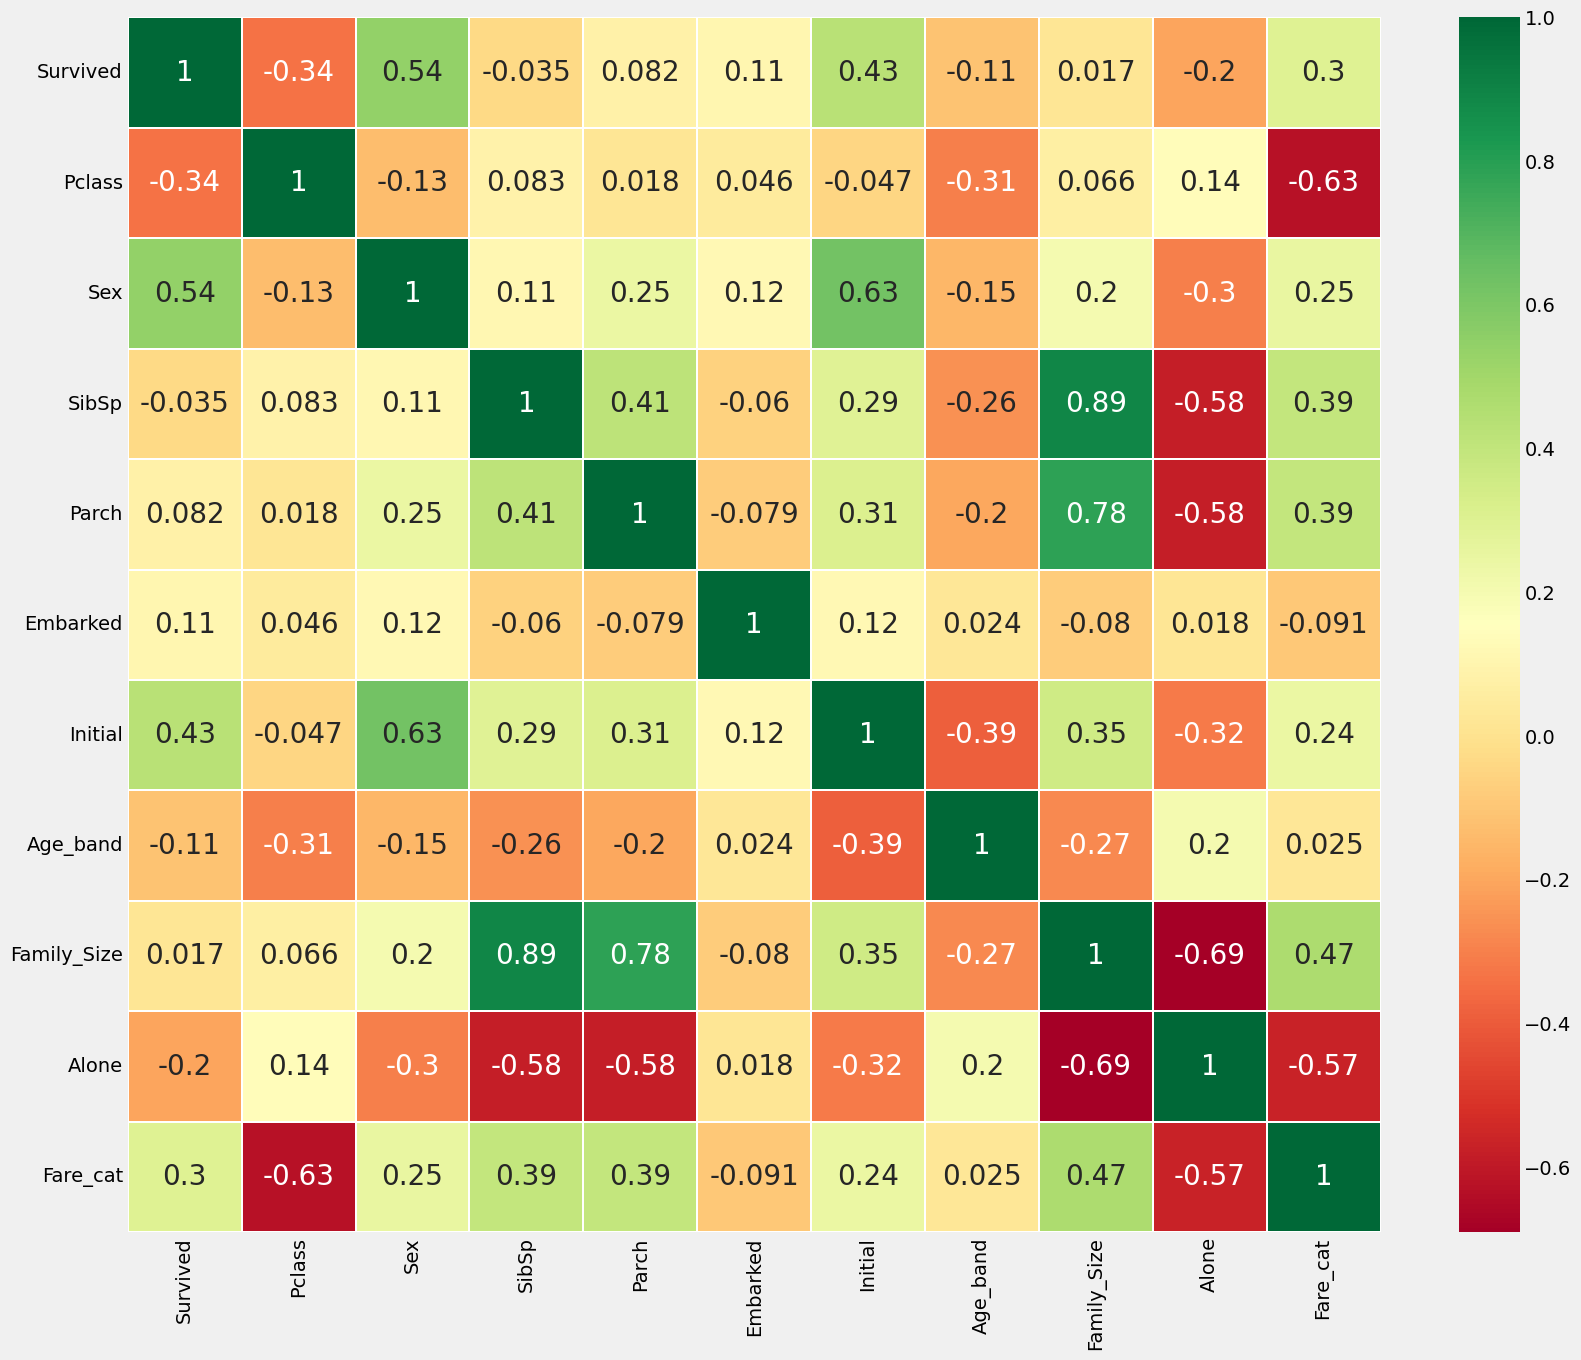

In [70]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [71]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [72]:
train, test = train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [77]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
#prediction1 = model.predict(test_X)
#print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,test_Y))

SVC(C=1, gamma=0.1)

In [79]:
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
#prediction2 = model.predict(test_X)
#print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

SVC(C=0.1, gamma=0.1, kernel='linear')

In [81]:
model = LogisticRegression()
model.fit(train_X,train_Y)
#prediction3 = model.predict(test_X)
#print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

LogisticRegression()

In [82]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
#prediction4 = model.predict(test_X)
#print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

DecisionTreeClassifier()

In [83]:
model = KNeighborsClassifier()
model.fit(train_X,train_Y)
#prediction5 = model.predict(test_X)
#print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

KNeighborsClassifier()

In [86]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X,train_Y)
 # prediction=model.predict(test_X)
 # a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
#plt.plot(a_index, a)
#plt.xticks(x)
#fig=plt.gcf()
#fig.set_size_inches(12,6)
#plt.show()
#print('Accuracies for different values of n are:',a.values,'with the max value as',a.values.max())

In [87]:
model = GaussianNB()
model.fit(train_X,train_Y)
#prediction6 = model.predict(test_X)
#print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

GaussianNB()

In [88]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
#prediction7 = model.predict(test_X)
#print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

RandomForestClassifier()

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Naive Bayes','Decision Tree','Random Forest']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for i in models:
  model = i
  cv_result = cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
  cv_result = cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,NaN,NaN
Radial Svm,NaN,NaN
Logistic Regression,NaN,NaN
KNN,NaN,NaN
Naive Bayes,NaN,NaN
Decision Tree,0.806979,0.043644
Random Forest,0.815980,0.044214


<Axes: >

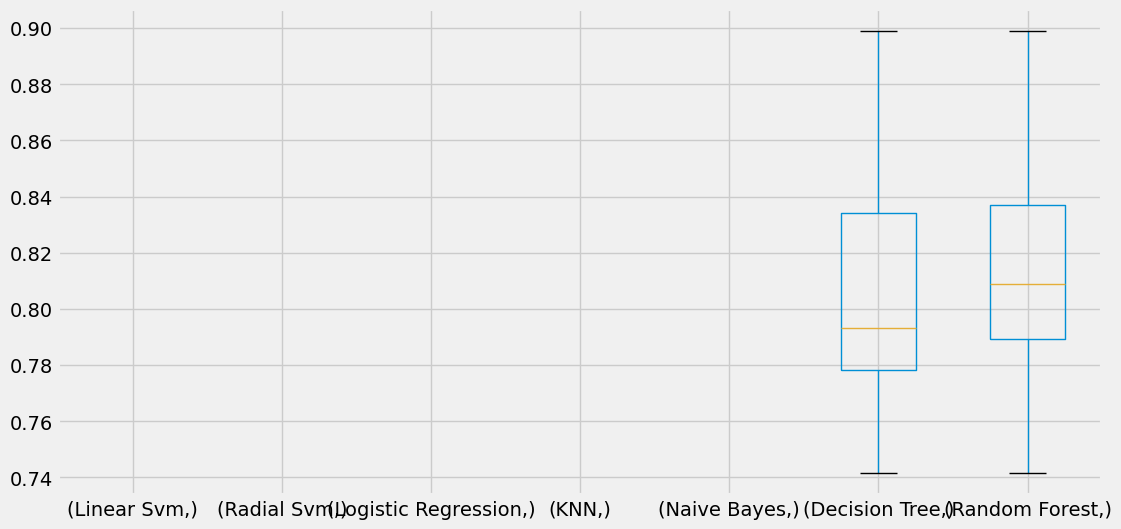

In [93]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

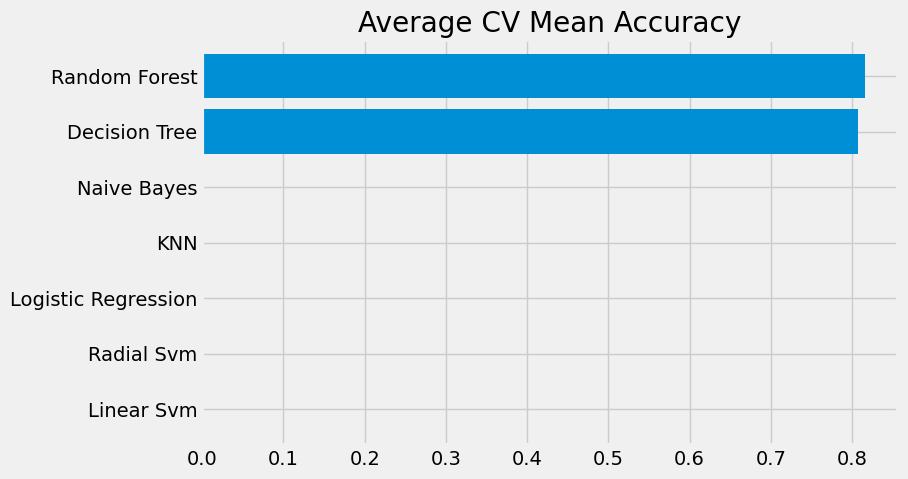

In [94]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

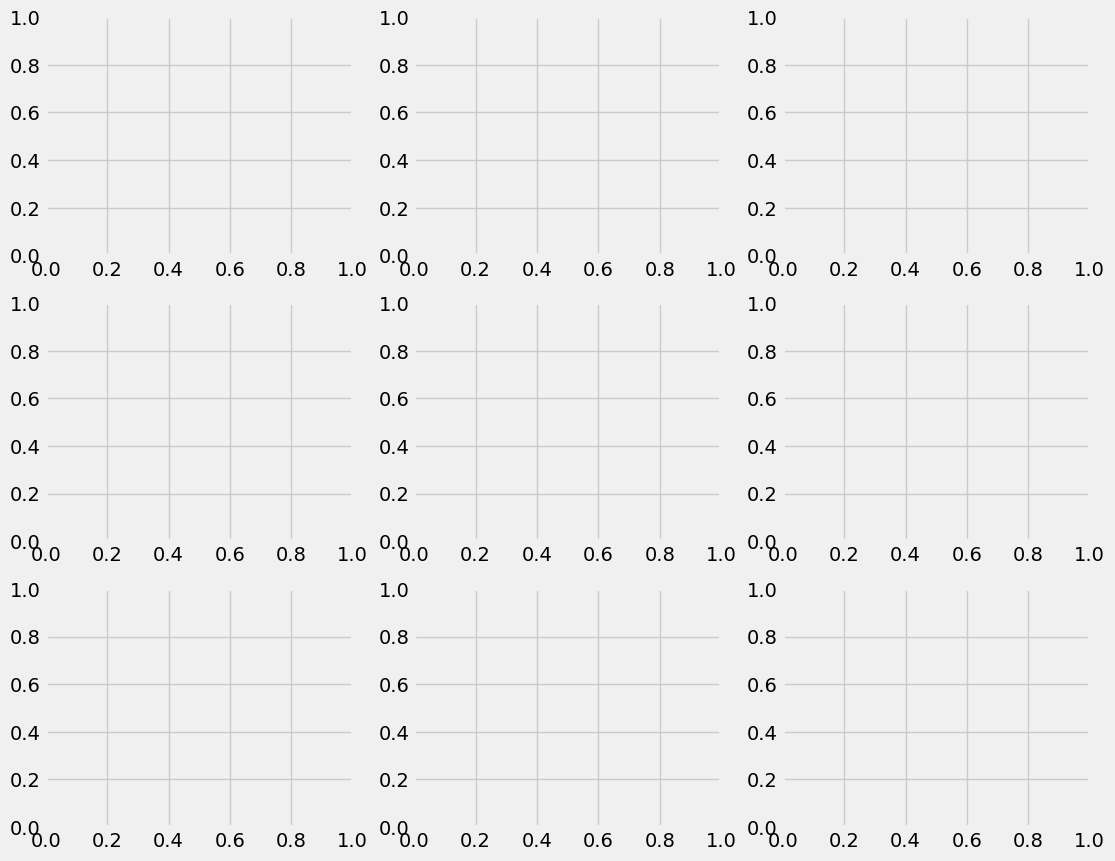

In [95]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [97]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
#gd.fit(X,Y)
#print(gd.best_score_)
#print(gd.best_estimator_)

In [98]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
#gd.fit(X,Y)
#print(gd.best_score_)
#print(gd.best_estimator_)

In [100]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
#print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The cross validated score is nan


In [102]:
from sklearn.ensemble import BaggingClassifier
#model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
#model.fit(train_X,train_Y)
#prediction=model.predict(test_X)
#print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
#result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
#print('The cross validated score for bagged KNN is:',result.mean())

In [104]:
#model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
#model.fit(train_X,train_Y)
#prediction=model.predict(test_X)
#print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
#result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
#print('The cross validated score for bagged Decision Tree is:',result.mean())

In [105]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: nan


In [106]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: nan


In [107]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8194007490636703


In [109]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
#gd.fit(X,Y)
#print(gd.best_score_)
#print(gd.best_estimator_)

In [112]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
#result=cross_val_predict(ada,X,Y,cv=10)
#sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

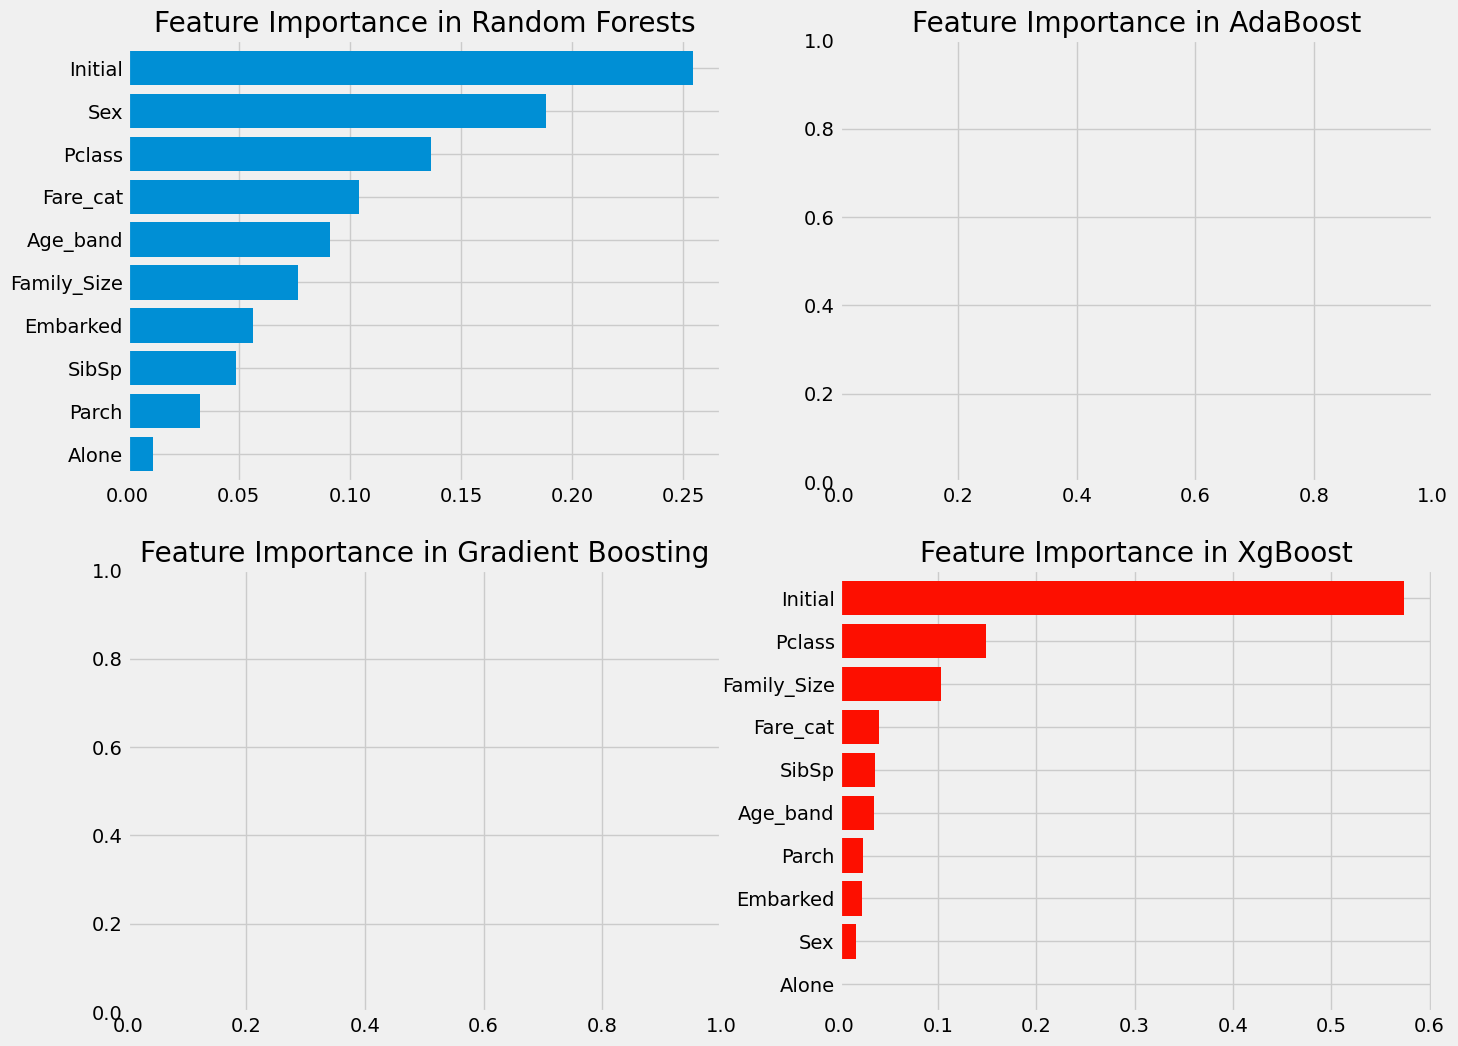

In [116]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
#model.fit(X,Y)
#pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
#model.fit(X,Y)
#pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()